## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [11]:
# related to question 3.A
!pip3 install sympy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sympy import symbols, Eq, solve
from numpy import log as ln

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [11]:
from sklearn.datasets import load_boston

# describe the boston dataset
boston_dataset = load_boston()
print(boston_dataset.DESCR)

df_boston_dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_boston_dataset['PRICE'] = pd.Series(boston_dataset.target)

print(f'Number of samples: {df_boston_dataset.shape[0]}',)
print(f'Number of features (categorical predictive): {df_boston_dataset.shape[1] - 1}\n',) # removing the PRICE target

df_boston_dataset.info()   # show the features' data type
df_boston_dataset.tail(5)  # show the last 5 rows in the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


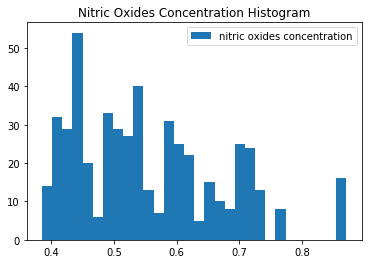

In [12]:
# produce a histogram of the nitric oxides concentration
plt.hist(df_boston_dataset['NOX'], bins=30, label="nitric oxides concentration")
plt.title('Nitric Oxides Concentration Histogram')
plt.legend()
plt.show()

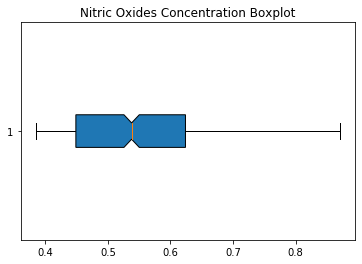

In [13]:
# Produce a boxplot of the nitric oxides concentration
plt.boxplot(df_boston_dataset['NOX'], patch_artist=True, notch='True', vert=False)
plt.title('Nitric Oxides Concentration Boxplot')
plt.show()

**Distribution Model**

'NOX' data: nitric oxides concentration (parts per 10 million)

According to the histogram below, the distribution seems to be a Gaussian Mixture Model. 
This matter can make sense since we are observing the nox of N different houses. 

This example is only for visual our histogram into k-Gaussian models.

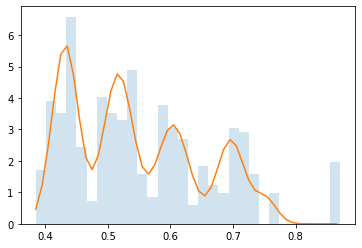

In [14]:
from sklearn.mixture import GaussianMixture
from scipy import stats


def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for mu, sigma, pi in zip(loc, scale, weights):
        d += pi * stats.norm.pdf(x, loc=mu, scale=sigma)
    return d


# Analyze the distribution according to the histogram's plot
f = np.ravel(df_boston_dataset['NOX']).astype(np.float)
f = f.reshape(-1, 1)
K = 6

mix = GaussianMixture(n_components=K, random_state=1, max_iter=100).fit(f)
pi, mu, sigma = mix.weights_.flatten(), mix.means_.flatten(), np.sqrt(mix.covariances_.flatten())

grid = np.arange(np.min(f), np.max(f), 0.01)

plt.hist(f, bins=30, density=True, alpha=0.2)
plt.plot(grid, mix_pdf(grid, mu, sigma, pi), label='varying weights')
plt.show()

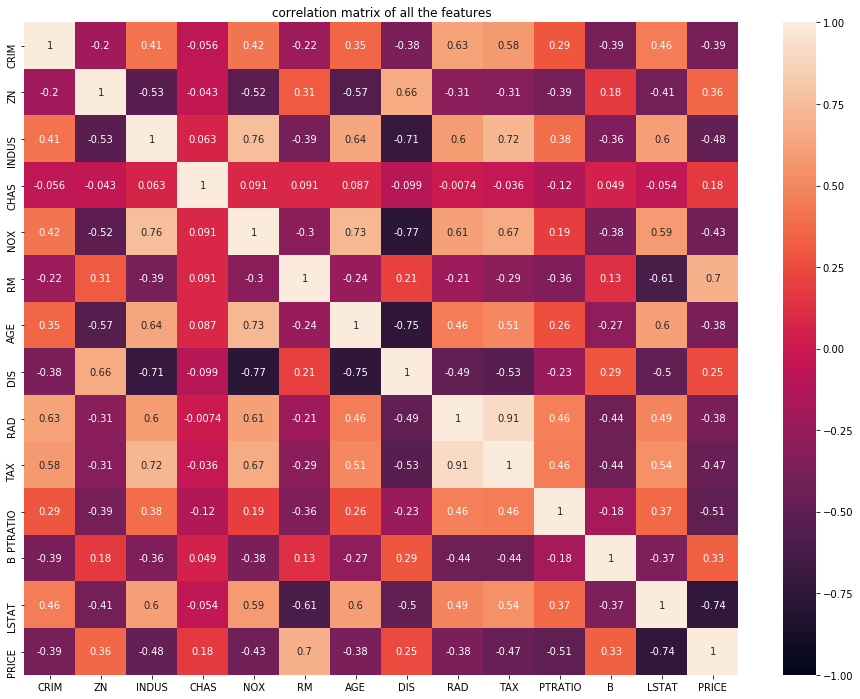

In [15]:
# Present a correlation matrix of all the features
plt.rcParams['figure.figsize'] = (16.0, 12.0)
sns.heatmap(df_boston_dataset.corr(), annot=True, vmin=-1, vmax=1)
plt.title('correlation matrix of all the features')
plt.show()

In [16]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)

**Correlation Matrix**

There are correlated features in our dataset:

* A high positive correlation of 0.91 between the radial highways (RAD) to the property-tax rate (TAX)
* A positive correlation of 0.76 between the nitric oxides concentration (NOX) to the non-retail business acres (INDUS)
* A negative correlation of -0.77 between the nitric oxides concentration (NOX) to the distances to five Boston employment centres (DIS)
* A negative correlation of -0.74 between the houses' price (PRICE) to the lower status of the population (LSTAT)

'CHAS' feature has unusual behavior, and it seems to me because this feature presents a dummy variable of Charles River (if tract bounds river than 1, otherwise 0).

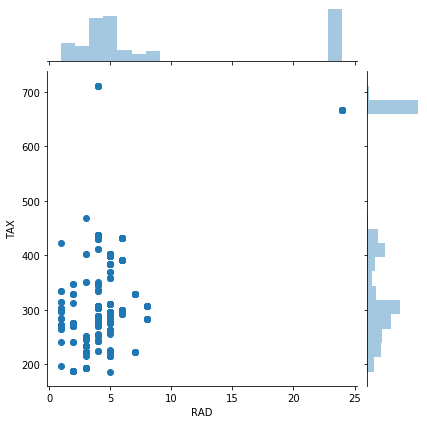

In [17]:
sns.jointplot(x=df_boston_dataset['RAD'], y=df_boston_dataset['TAX'], marginal_kws=dict(bins=20))
plt.show()

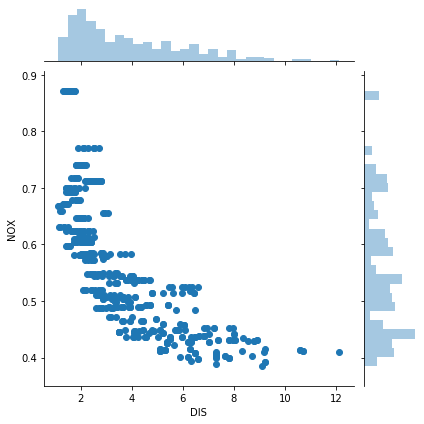

In [18]:
sns.jointplot(x=df_boston_dataset['DIS'], y=df_boston_dataset['NOX'], marginal_kws=dict(bins=30))
plt.show()

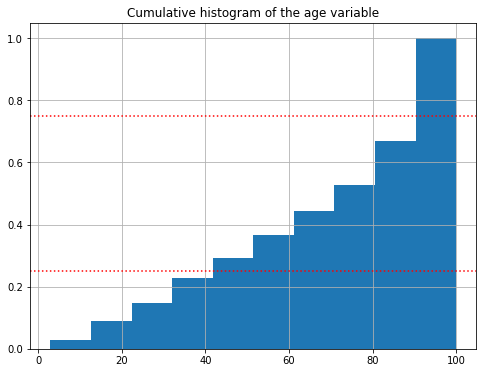

In [19]:
# Present a cumulative histogram of the age variable (including on the first and third quartile lines)
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.axhline(0.25, color='r', linestyle='dotted')
plt.axhline(0.75, color='r', linestyle='dotted')

df_boston_dataset['AGE'].hist(density=True, cumulative=True)
plt.title('Cumulative histogram of the age variable')
plt.show()

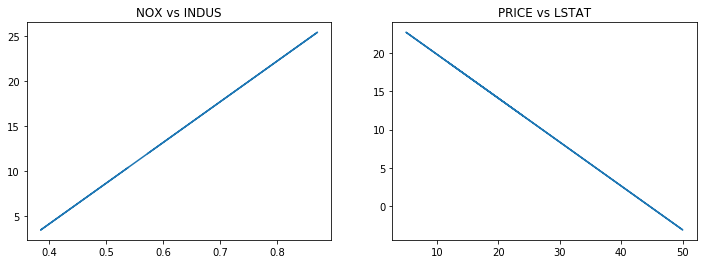

In [20]:
# Identify 2 “interesting” trends in the data
# Based on the matrix correlation, I mentioned 2 more "interesting" trends
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_nox = df_boston_dataset['NOX']
y_indus = df_boston_dataset['INDUS']
m, b = np.polyfit(x_nox, y_indus, 1)
axes[0].plot(x_nox, m * x_nox + b)
axes[0].set_title('NOX vs INDUS')

x_price = df_boston_dataset['PRICE']
y_lstat = df_boston_dataset['LSTAT']
m, b = np.polyfit(x_price, y_lstat, 1)
axes[1].plot(x_price, m * x_price + b)
axes[1].set_title('PRICE vs LSTAT')

plt.show()

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your answer is yes, provide an example.
If your answer is no, provide a proof.

***Answer 2.A***

Yes, pairwise independence does not generally imply mutual independence, as the latter is a more robust condition.

According to the question, the individual variables $X_1, X_2,X_3$ are pair-wisely independent.
In the case of variable pairs in a multivariate normal, zero correlation implies independence, $X_i$ ~ $N(0, I)$.

**An Exmaple** \
${\displaystyle \mathrm {P} (A)=\mathrm {P} (B)=\frac12}$ and ${\displaystyle \mathrm {P} (C)=\frac14}.$ 

The random variables are pairwise independent because \
${\displaystyle \mathrm {P} (A|B)=\mathrm {P} (A|C)=\frac12=\mathrm {P} (A)},$ \
${\displaystyle \mathrm {P} (B|A)=\mathrm {P} (B|C)=\frac12=\mathrm {P} (B)},$ \
${\displaystyle \mathrm {P} (C|A)=\mathrm {P} (C|B)=\frac14=\mathrm {P} (C)};$

However, the three random variables are not mutually independent.
In the pairwise independent case, although any one event is independent of each of the other two individually, it is not independent of the intersection of the other two:

$\mathrm{P}(A|BC) = \frac{\frac{4}{40}}{\frac{4}{40} + \frac{1}{40}} = \tfrac{4}{5} \ne \mathrm{P}(A)$ \
$\mathrm {P} (B|AC)={\frac {\frac {4}{40}}{{\frac {4}{40}}+{\frac {1}{40}}}}={\tfrac {4}{5}}\neq \mathrm {P} (B)$ \
$\mathrm {P} (C|AB)={\frac {\frac {4}{40}}{{\frac {4}{40}}+{\frac {6}{40}}}}={\tfrac {2}{5}}\neq \mathrm {P} (C)$

Hence the set of events are not collectivley independent.

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

***Answer 2.B***

It takes $n \cdot m \cdot k - 1$ parameters to define the joint distribution (on all possible values of these variables). 

It takes $n \cdot m \cdot k$ numbers to write down a probability distribution on all possible values of these variables, but since they are redundant (because they must sum to 1), so the number of the parameters can be $n \cdot m \cdot k - 1$.

For instance, when a certain method is used to collect a fixed volume of rock samples in a region, there are 3 rock types. \
Let $X_1, X_2$ denote the proportion by volume of rock types 1, and 2 in a randomly selected sample, therefore the proportion of rock type 3 is redundant because $X_3 = 1−X_1−X_2$.

Definitions: \
if $X_1, · · · , X_n$ are all discrete random variables, then the joint pmf of the variables is the function: \
$p(x_1, · · · , x_n) = P(X_1 = x_1, · · · , X_n = x_n).$ \
In our case we have 3 discrete random variables X, Y and Z, then the 3 parameters (n,m,k) will be defined respectivley, $p(m,n,k) = P(X = m_i, Y = n_i, Z = k_i).$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

***Answer 2.C***

It takes $(n - 1) + (m - 1) + (k - 1)$ parameters to define the joint distribution.

By definition, X and Y are independent if knowing the value of one of the random variables does not change the distribution of the other random variable. For discrete random variables, the condition of independence is equivalent
to $P(X = x, Y = y) = P(X = x)P(Y = y)$ for all x, y. \
For multiple discrete random variables: discrete random variables $X_1,X_2,...,X_n$ are independent if the joint pmf factors into a product of the marginal pmf's: $P(X_1,X_2,...,X_n)=P_{𝑋_1}(X_1)P_{𝑋_2}(X_2)...P_{X_n}(X_n)$

In our case, consider the simple setting that each X, Y, and Z represent the outcomes n,m, and k, we get the condition below, according to the definition of independence:

$P(X,Y,Z) = P(X)P(Y)P(Z) = P(n_i)P(m_i)P(k_i)$

Hence, since we have for each distribution m, n and k possible outcomes respectivley, it takes $n + m + k$ parameters to define the joint distribution, when we know that X,Y and Z are independent, and as I already mentioned in 2.B, we may not consider the last element since it is redundant, thus I subtract by 1.

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

***Answer 2.D***

It takes $(k \cdot (n - 1)) + (k \cdot (m - 1)) + (k - 1)$ parameters to define the joint distribution.

Definitions: \
We say X and Y are conditionally independent given Z, denoted: $X \perp Y | Z$, if the conditional joint factorizes as
$P(x,y | z) = P(x | z)P(y | z)$.

According to the question, we represent the joint distribution as:
$P(x,y,z) = P(x|z)P(y|z)P(z)$ assuming $X \perp Y | Z$. \
In this case:
* $P(x | z)$ requires $n \cdot k$ parameters: one for each $k_i$ in Z.
* $P(y | z)$ requires $m \cdot k$ parameters: one for each $k_i$ in Z.
* $P(z)$ requires $k$ parameter.

Hence, $(n + m)\cdot k + k = k \cdot n + k \cdot m + k$ parameters will be defined, when X and Y are conditionaly independent given Z, and as I already mentioned in 2.B, we may not consider the last element since it is redundant, thus I subtract by 1.

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

***Answer 2.E***

A box contains two coins: 
* A regular coin, denote as $C$.
* A fake two-headed coin, denote as $C_{Fake} => P(Head)=1$. 

We choose a coin twice at random and toss it twice. We define the following events:
* $X$ = The first coin toss result is Head. {$HT, HH$}
* $Y$ = The second coin toss result is Head. {$HH, TH$}
* $Z$ = The regular coin has been selected ($C$). {$C, C$}

**Probabilities** 
* The probability of choosing a coin is $\frac12$.
* The probability of getting a Head (based on the regular coin) is $\frac12$.
* The probability of getting a Head (based on the fake coin) is 1.

According to the conditionally independent Z, it was given that the regular coin was selected,thus \
$P(X|Z) = P(Y|Z) = \frac12 = (\frac12 \cdot \frac12) + (\frac12 \cdot \frac12)$ \
$P(X \cap Y | Z) = \frac14 = \frac12 \cdot \frac12$

Now let's define $P(X), P(Y)$, and $P(X \cap Y)$, using the law of total probability (another option can be to calculate the probabilities using a visualization of the "Tree" decisions): \
$P(X) = P(X|Z)P(Z) + P(X|C_{Fake})P(C_{Fake}) = (\frac12 \cdot \frac12) + (1 \cdot \frac12) = \frac34$ \
$P(Y) = P(Y|Z)P(Z) + P(Y|C_{Fake})P(C_{Fake}) = (\frac12 \cdot \frac12) + (1 \cdot \frac12) = \frac34$ \
$P(X \cap Y) = P(X \cap Y | Z)P(Z) + P(X \cap Y | C_{Fake})P(C_{Fake})$ \
$= P(X|Z)P(Y|Z)P(Z) + P(X|C_{Fake})P(Y|C_{Fake})P(C_{Fake})$ \
$= (\frac12 \cdot \frac12 \cdot \frac12) + (1 \cdot 1 \cdot \frac12) = \frac58$

Hence, as we can see: $P(X \cap Y) = \frac58 \neq P(X)P(Y) = \frac9{16}$, \
X and Y are NOT independent, but they are conditionally independent given z.

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [26]:
# Option 1: implement the EM algorithm according to the given parameters
def mix_pdf(x, loc, scale, weights):
    d = np.zeros_like(x)
    for mu, sigma, pi in zip(loc, scale, weights):
        d += pi * stats.norm.pdf(x, loc=mu, scale=sigma)
    return d


def initial_weights(n_components, weights_init):
    sum_weights = 1
    count_components = n_components
    for i in range(0, n_components):
        if weights_init[i] is not None:
            sum_weights -= weights_init[i]
            count_components -= 1

    for i in range(0, n_components):
        if weights_init[i] is None:
            weights_init[i] = sum_weights / count_components

    return np.array(weights_init)


def initial_means(n_components, means_init):
    for i in range(0, n_components):
        if means_init[i] is None:
            means_init[i] = np.random.randint(low=4, high=10, size=1)[0]
    return np.array(means_init)


def initial_sigmas(n_components, sigmas_init):
    for i in range(0, n_components):
        if sigmas_init[i] is None:
            sigmas_init[i] = 0.5
    return np.array(sigmas_init)


def calculate_responsibilities(data, n_components, weights, means, sigmas):
    respons = np.empty((data.shape[0], n_components), dtype=np.float32)

    for k in range(0, n_components):
        for idx, x in enumerate(data):
            respons[idx, k] = weights[k] * stats.norm.pdf(x[0], loc=means[k], scale=sigmas[k])

    for idx, x in enumerate(data):
        sum_k = 0
        for k in range(0, n_components):
            sum_k += respons[idx, k]
        for k in range(0, n_components):
            respons[idx, k] = respons[idx, k] / sum_k

    return respons


def update_weights(weights, respons):
    N = respons.shape[0]
    K = respons.shape[1]

    for k in range(0, K):
        if k == 0 or k == 2:  # only update w_1 & w_3
            sum = 0
            for idx, x in enumerate(f):
                sum += respons[idx, k]
            weights[k] = (1/N) * sum

    return weights


def update_means(means, weights, respons, data):
    N = respons.shape[0]
    K = respons.shape[1]

    for k in range(0, K):
        if k == 2:  # only update m_3
            sum = 0
            for idx, x in enumerate(data):
                sum += respons[idx, k] * x[0]
            means[k] = (1/(weights[k]*N)) * sum

    return means


def update_sigmas(sigmas, means, weights, respons, data):
    N = respons.shape[0]
    K = respons.shape[1]

    for k in range(0, K):
        sum = 0
        for idx, x in enumerate(data):
            sum += respons[idx, k] * np.power((x[0] - means[k]), 2)
        sigmas[k] = (1/(weights[k]*N)) * sum

    return sigmas


def expectation_maximization(data, n_components, weights_init, means_init, sigmas_init, max_iter=100):
    # initial parameters
    weights = initial_weights(n_components, weights_init)
    means = initial_means(n_components, means_init)
    sigmas = initial_sigmas(n_components, sigmas_init)

    count = 0
    while count < max_iter:
        # expectation step
        respons = calculate_responsibilities(data, n_components, weights, means, sigmas)

        # maximization step
        weights = update_weights(weights, respons)
        means = update_means(means, weights, respons, data)
        # we do not calculate the sigmas, since they have already been given
        # sigmas = update_sigmas(sigmas, means, weights, respons, data)

        # count iterations
        count += 1

    return means, sigmas, weights

In [27]:
# initial parameters
n_components = 3
weights_init = [None, 0.25, None]
means_init = [4, 9, None]
sigmas_init = [0.5, 0.5, 1.5]

df_gmd = pd.read_csv('GMD_2021.csv', names=['SAMPLES', 'GMM'])
f = np.ravel(df_gmd['GMM']).astype(np.float)
f = f.reshape(-1, 1)

mu, sigma, pi = expectation_maximization(f, n_components, weights_init, means_init, sigmas_init)

# print results of the means, weights and sigmas
count = 1
for m, p, s in zip(mu, pi, sigma):
    print(f'Component {count} - Mean:{m:.2f}, Sigma:{s:.2f}, Weight:{p:.2f}')
    count += 1

Component 1 - Mean:4.00, Sigma:0.50, Weight:0.12
Component 2 - Mean:9.00, Sigma:0.50, Weight:0.25
Component 3 - Mean:15.00, Sigma:1.50, Weight:0.63


In [28]:
# Option 2: using the parameter estimation equations

#####################################################################################################
# parameters calculation using the given equations: please follow the calculations below (in LaTex) #
#####################################################################################################

# the given GMM parameters 
m_1, m_2, m_3 = 4, 9, None
sigma_1, sigma_2, sigma_3 = 0.5, 0.5, 1.5
w_1, w_2, w_3 = None, 0.25, None

Mean = np.mean(df_gmd['GMM'])
Variance = np.var(df_gmd['GMM'])

# notations
y, z = symbols('y z')

# first equation
mean_equation = Eq(y*z - 4*y - 6.95, 0)

# second equation
variance_equation = Eq(y*(z**2) - 24.4*y*z + 83.6*y + 35.68, 0)

res = solve((mean_equation, variance_equation), (y, z))[0]
w_3, m_3 = float(res[0]), float(res[1])
w_1 = 0.75 - float(w_3)

mu_eq = np.array([m_1, m_2, m_3])
sigma_eq = np.array([sigma_1, sigma_2, sigma_3])
pi_eq = np.array([w_1, w_2, w_3])

# print results of the means, weights and sigmas
count = 1
for m, p, s in zip(mu_eq, pi_eq, sigma_eq):
    print(f'Component {count} - Mean:{m:.2f}, Sigma:{s:.2f}, Weight:{p:.2f}')
    count += 1

Component 1 - Mean:4.00, Sigma:0.50, Weight:0.12
Component 2 - Mean:9.00, Sigma:0.50, Weight:0.25
Component 3 - Mean:15.09, Sigma:1.50, Weight:0.63


## Parameter Estimation - GMM - Using The Equations

#### Notations

* DATA = The all data ($arr_1 + arr_2 + arr_3$)

### By Definition

#### Mean:
$\mu_{GMM} = \sum{w_i \cdot \mu_i} = w_1 \cdot \mu_1 + w_2 \cdot \mu_2 + w_3 \cdot \mu_3$ \
$\mu_{GMM} = \mu_{DATA}$

#### Variance:
$\sigma^2_{GMM} = \sum{w_i \cdot Variance(arr_i)} = w_1 \cdot Variance(arr_1) + w_2 \cdot Variance(arr_2) + w_3 \cdot Variance(arr_3)$ \
$\sigma^2_{GMM} = \sigma^2_{DATA}$

#### Weights:
All the weights are sum up to 1, therefore: \
$w_1  = 1 - (w_2 + w_3) = 1 - (0.25 + w_3) = 0.75 - w_3$ \
$w_2 = 0.25$ \
$w_3 = w_3$

### Calculations:

#### Notations:

* $w_1 = x = 0.75 - y$ ,(according to the weight calculation above)
* $w_3 = y$
* $\mu_3 = z$

#### First Equation

$w_1 \cdot \mu_1 + w_2 \cdot \mu_2 + w_3 \cdot \mu_3 = \mu_{DATA}$ \
$= x \cdot 4 + 0.25 \cdot 9 + y \cdot z = 12.2$ \
$= (0.75 - y) \cdot 4 + 2.25 + y \cdot z = 12.2$ \
$= 3 - 4 \cdot y + 2.25 + y \cdot z = 12.2$ \
$= y \cdot z - 4 \cdot y - 6.95 = 0$

### Mean Equation: $= y \cdot z - 4 \cdot y - 6.95 = 0$

#### Second Equation

$w_1 \cdot \sigma_1^2 + w_2 \cdot \sigma_2^2 + w_3 \cdot \sigma_3^2 + w_1 \cdot (\mu_1 - \mu_{DATA})^2 + w_2 \cdot (\mu_2 - \mu_{DATA})^2 + w_3 \cdot (\mu_3 - \mu_{DATA})^2 = \sigma^2_{DATA}$ \
$= x \cdot (0.5)^2 + 0.25 \cdot (0.5)^2 + y \cdot (1.5)^2 + x \cdot (4 - 12.2)^2 + 0.25 \cdot (9 - 12.2)^2 + y \cdot (z - 12.2)^2 = 17.56$ \
$= x \cdot 0.25 + 0.0625 + y \cdot 2.25 + x \cdot 67.24 + 2.56 + y \cdot (z^2 - 24.4 \cdot z + 148.84) = 17.56$ \
$= x \cdot 67.49 + 2.6225 + y \cdot 2.25 + y \cdot z^2 - 24.4 \cdot y \cdot z + 148.84 \cdot y = 17.56$ \
$= x \cdot 67.49 + 2.6225 + 151.09 \cdot y + y \cdot z^2 - 24.4 \cdot y \cdot z = 17.56$ \
$= (0.75 - y) \cdot 67.49 + 2.6225 + 151.09 \cdot y + y \cdot z^2 - 24.4 \cdot y \cdot z = 17.56$ \
$= 50.6175 - 67.49 \cdot y + 2.6225 + 151.09 \cdot y + y \cdot z^2 - 24.4 \cdot y \cdot z = 17.56$ \
$= y \cdot z^2 - 24.4 \cdot y \cdot z + 83.6 \cdot y + 35.68 = 0$

### Variance Equation: $= y \cdot z^2 - 24.4 \cdot y \cdot z + 83.6 \cdot y + 35.68 = 0$

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

****Answer 3.B****

I chose to use the min and the max values of the data to be the adequate limits for the axes since I would like to present all of the data in my plot visualization. Using 30 as bins present better results for our calculations and for the grid, I used the movement of 0.01 since the data density fits this number.

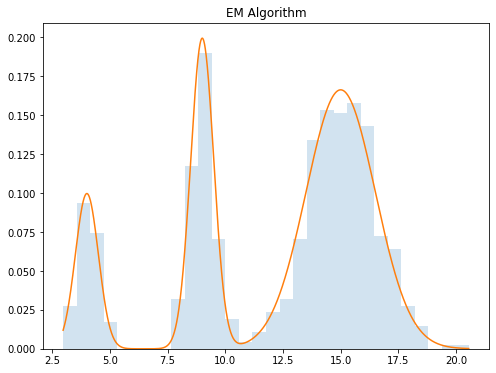

In [29]:
# using the EM algorithm
grid = np.arange(np.min(f), np.max(f), 0.01)
plt.hist(f, bins=30, density=True, alpha=0.2)
plt.plot(grid, mix_pdf(grid, mu, sigma, pi))
plt.title('EM Algorithm')
plt.show()

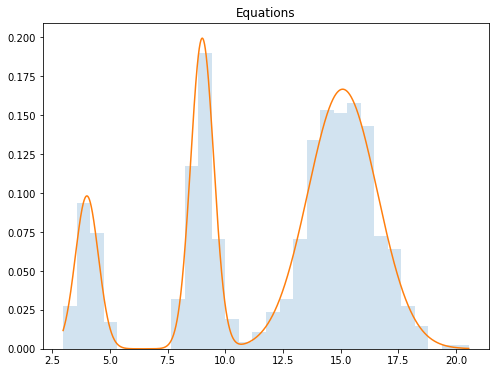

In [30]:
# using the equations
grid_eq = np.arange(np.min(f), np.max(f), 0.01)
plt.hist(f, bins=30, density=True, alpha=0.2)
plt.plot(grid, mix_pdf(grid_eq, mu_eq, sigma_eq, pi_eq))
plt.title('Equations')
plt.show()

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, \mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

****Answer 3.C****

Option 1 - Steps
* Create a Normal distribution based on the given parameters with the size of N.
* Initial an empty GMD array which will be filled based on the weights' condition.
* Use the range of N to repeat the process below:
  * Randomize a probability P based on the "Uniform" distribution according to the weight of each distribution.
  * Add to the GMD array the chosen value from one of the Normal distributions (based on their weights).

Option 2 - Steps:
* Generate 3 Normal distributions (based on the question) with the size of N times the weight of each distribution.
* Concatenate the 3 random variables of each Normal distribution into one array which represents the GMD data.

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


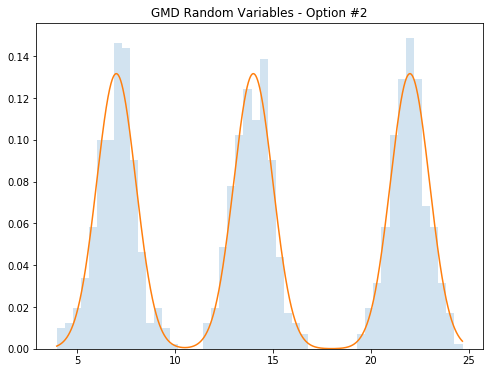

In [31]:
# Present option 2
mu_1, sigma_1, w_1 = mu[0] + 3, 1, 0.33
mu_2, sigma_2, w_2 = mu[1] + 5, 1, 0.33
mu_3, sigma_3, w_3 = mu[2] + 7, 1, 0.33

N = 1000
norm_1 = stats.norm.rvs(loc=mu_1, scale=sigma_1, size=int(N * w_1))
norm_2 = stats.norm.rvs(loc=mu_2, scale=sigma_2, size=int(N * w_2))
norm_3 = stats.norm.rvs(loc=mu_3, scale=sigma_3, size=int(N * w_3))

gmd_data = np.concatenate((norm_1, norm_2, norm_3))
gmd_grid = np.arange(np.min(gmd_data), np.max(gmd_data), 0.01)
plt.hist(gmd_data, bins=50, density=True, alpha=0.2)
plt.plot(gmd_grid, mix_pdf(gmd_grid, np.array([mu_1, mu_2, mu_3]), np.array([sigma_1, sigma_2, sigma_3]), np.array([w_1, w_2, w_3])))
plt.title('GMD Random Variables - Option #2')
plt.show()

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


In [66]:
# Present option 1
norm_1 = stats.norm.rvs(loc=mu_1, scale=sigma_1, size=N)
norm_2 = stats.norm.rvs(loc=mu_2, scale=sigma_2, size=N)
norm_3 = stats.norm.rvs(loc=mu_3, scale=sigma_3, size=N)

gmd_data = np.array([])

for i in range(N):
    p = stats.uniform.rvs(size=1)
    if p < w_1:
        gmd_data = np.append(gmd_data, np.random.choice(a=norm_1, size=1))
    elif p > w_1 and p < w_2:
        gmd_data = np.append(gmd_data, np.random.choice(a=norm_2, size=1))
    else:
        gmd_data = np.append(gmd_data, np.random.choice(a=norm_3, size=1))

gmd_grid = np.arange(np.min(gmd_data), np.max(gmd_data), 0.01)
plt.hist(gmd_data, bins=30, density=True)
plt.plot(gmd_grid, mix_pdf(gmd_grid, np.array([mu_1, mu_2, mu_3]), np.array([sigma_1, sigma_2, sigma_3]), np.array([w_1, w_2, w_3])))
plt.title('GMD Random Variables - Option #1')
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [32]:
mu = 70000
sigma = 30000
res = stats.norm.cdf(50000, loc=mu, scale=sigma)
print(f'{res * 100:.2f}%')

25.25%


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [33]:
res_65k = stats.norm.cdf(65000, loc=mu, scale=sigma)
res_45k = stats.norm.cdf(45000, loc=mu, scale=sigma)
print(f'{(res_65k - res_45k) * 100:.2f}%')

23.15%


#### 4.C
What percent of people earn more than 70,000 RCU?

In [34]:
res = 1 - stats.norm.cdf(70000, loc=mu, scale=sigma)
print(f'{res*100:.2f}%')

50.00%


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [35]:
size = 1000
res = (1 - stats.norm.cdf(140000, loc=mu, scale=sigma))
print(f'{int(res*size)} people')

9 people


#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

In [36]:
# by the central limit theorem for means, I divided the scale by sqrt(50)
group_size = 50
res_70k = stats.norm.cdf(70000, loc=mu, scale=sigma/np.sqrt(group_size))
res_50k = stats.norm.cdf(50000, loc=mu, scale=sigma/np.sqrt(group_size))
p = res_70k - res_50k

# using binom distribution with probability p, to find 10 groups (x) and more from 20 groups (n)
n = 20
x = 10
res = 1 - stats.binom.cdf(x, n, p)  # P(X>10) = 1 - P(X <10)
print(f'probability: {res}')

probability: 0.411897195116123


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [37]:
# option 1: to use the base formula: E(T) = n * H(n)
def harmonic(n):
    return np.sum(1 / np.arange(1, n + 1))


def expected_time(n):
    return n * harmonic(n)

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [38]:
# using the independence of the random variables of T ~ Geom(p), we get:
# V(T) = V(t1) + V(t2) + ... + V(tn) 
def variance_time(n):
    variance = 0
    for i in range(1, n + 1):
        p = (n - i + 1) / n
        variance += stats.geom.var(p)
    return variance

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

In [39]:
# I used the formula: P(Z=z) = \sum_-infinty:infinty P(X=i)P(Y=z-i)
def probability(n, x):
    series = (n - np.arange(n)) / n  # probabilities
    variables = np.arange(x) + 1  # random variables

    # calculate the probabilities of the first p in the series
    p = np.array([])
    for i in variables:
        p = np.append(p, stats.geom.pmf(i, series[0]))

    for i in series[1:]:  # start with the second probability
        # calculate the probabilities of the p_i with all the given variables
        p_i = np.array([])
        for z in variables:
            p_i = np.append(p_i, stats.geom.pmf(z, i))
        # convolve the previous with the current probabilities (using the independence of the random variables)
        p = np.convolve(p, p_i)

    return 1 - np.sum(p[:x + 1 - n])  # P(X>x) = 1 - P(X<x) = 1 - [P(1) + P(2) + ... + P(x)]


print(probability(20, 40))

0.9641122736925725


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [41]:
def large_deviation(n, lamda):
    mu_t = expected_time(n)
    var_t = variance_time(n)
    sigma = np.sqrt(var_t)

    b = (mu_t - lamda) / sigma

    return 1 - (1 / np.power(b, 2))


print(f'The probability is greater than {large_deviation(20, 40)}')

The probability is greater than 0.44520064682904903
